# STINTSY Major Course Output

*S12 - Ryan Jay Deculawan, Hyenne Audrey Lim, Viktoria Lila Sicuan*

## 1. Introduction

Soccer's extraordinary global appeal, with 3.5 billion supporters worldwide, cements its position as the most watched sport on the planet. Soccer creates a common passion that brings people from all walks of life together (The Most Popular Sports In The World, n.d.). This worldwide sport has the remarkable potential to cross cultural, language, and geographical borders, bringing people together from all walks of life. Fans congregate in their homes, bars, or stadiums to form a feeling of community and shared identity. Soccer's ongoing popularity stems from its capacity to bring together people of all ages and skill levels, making it more than simply a game but a celebration of athleticism, teamwork, and the universal spirit of competitiveness.

Soccer's enormous commercial worth is clear in the huge sums it earns for numerous leagues throughout the world. Soccer leagues have the highest TV viewership of any sports league, which contributes greatly to the sport's economic supremacy. The World Cup, the flagship event, is the embodiment of this phenomena, easily outshining every other significant athletic event. The tremendous viewership and worldwide influence of the World Cup highlight soccer's power to captivate the collective interest and intrigue of audiences on an unprecedented scale, transforming it into more than simply a game but a global cultural phenomenon. Soccer's economic impact, paired with its exciting dynamics, solidifies it as a sporting superpower that crosses geographical and cultural barriers (The World’s Most Watched Sports, 2017).

### Problem

Home advantage, which occurs in all sports, including soccer, is caused by a mix of psychological and physiological variables. The presence of ardent supporters fosters a supportive and motivational environment for the home side while perhaps influencing referee decisions owing to crowd reactions. Furthermore, the physical and emotional exhaustion involved with travel for visiting teams contributes to the home edge. The familiarity with the particular qualities of the home field, like as pitch size and surface, further tilts the scale in favor of the home side. Home advantage is essentially a complicated interaction of crowd support, referee dynamics, travel-related obstacles, and field familiarity that shapes the competitive landscape of sports (Zheng, 2015).

With this in mind, our objective is to investigate the feasibility of forecasting home advantage based on a snapshot of soccer matches. This project intends to emphasize the complex problems of applying modeling tools to real-life events, particularly in the dynamic environment of soccer matches. These machine learning models can help teams plan better strategies by offering insights into their opponents' strengths and weaknesses, such as knowing whether it is strategically better to play aggressively given the statistics of the match. Fans may also appreciate the game on a whole new level through the analysis of data and understanding the aspects that contribute to a team's success. Furthermore, predictive models can assist spectators in making better educated predictions about the outcome of a game, which can increase the enjoyment of watching the game.

## 2. Description of the Dataset

To address the identified task, the Sports dataset was selected. This dataset contains 7000 random snapshots from soccer matches. This dataset was used as part of a [Kaggle Community Prediction Competition](https://www.kaggle.com/competitions/sports-trading-will-there-be-more-goals/overview).

One row in the dataset represents one snapshot of a match while one column represents one feature of a match. As mentioned, there are **7000 instances** (rows), and **21 features** (columns). The features of the dataset are as follows:

1. `uuid` - The unique identifier of the snapshot
2. `current_minute` - The current minute of the in-play match. The 15 minute half-time break is included so a match has a total of 105 minutes. A current_minute of 70 corresponds to the actual match time of 55.
3. `home_score` - Goals scored by the home team as of this current_minute
4. `away_score`– Goals scored by the away team as of this current_minute
5. `home_yellow_cards` - Yellow cards given to the home team as of this current_minute
6. `away_yellow_cards` - Yellow cards given to the away team as of this current_minute
7. `home_red_cards` - Red cards given to the home team as of this current_minute
8. `away_red_cards` - Red cards given to the away team as of this current_minute
9. `home_attacks` - Attacks attempted by the home team as of this current_minute
10. `away_attacks` - Attacks attempted by the away team as of this current_minute
11. `home_dangerous_attacks` - Dangerous attacks attempted by the home team as of this current_minute
12. `away_dangerous_attacks` - Dangerous attacks attempted by the away team as of this current_minute
13. `home_corners` - Corners awarded to the home team as of this current_minute
14. `away_corners` - Corners awarded to the away team as of this current_minute
15. `home_off_target` - Shots that didn't have to be cleared by the goalkeeper that were attempted to the home team as of this current_minute
16. `away_off_target` - Shots that didn't have to be cleared by the goalkeeper that were attempted to the away team as of this current_minute
17. `home_on_target` - Shots that had to be cleared by the goalkeeper that were attempted to the home team as of this current_minute`
18. `away_on_target` - Shots that had to be cleared by the goalkeeper that were attempted to the away team as of this current_minute`
19. `home_possession` - How much ball possession in % did the home team have until this current_minute`
20. `away_possession` - How much ball possession in % did the away team have until this current_minute`
21. `final_delta` - The intended target value for each instance. Given that this dataset is from a competition, this column was provided as the value to be predicted for an instance's set of features.

## 3. List of Requirements

The following are the libraries and modules used to run the notebook.

In [166]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint
from scipy.stats import uniform
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Import necessary libraries

# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models and Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# import xgboost as xgb


## 4. Data Preprocessing and Cleaning

### I. Load and Inspect the Data
- Initial Check: Start by inspecting the data types, missing values, and unique values. This helps determine what cleaning actions are necessary (Han et al., 2011).
- Data Types: Confirm the data types for each column, ensuring numerical values are correctly identified for calculations and models.


In [167]:
df = pd.read_csv('sports.csv')

# Display the first few rows to understand the structure
df.head()

print(df.info())  # Provides counts of data type and non-null
print(df.describe())  # Statistical summary for numeric fields
print(df.isnull().sum())  # Check for missing values

# Drop the 'uuid' column as it is not useful for analysis or modeling
df.drop(columns=['uuid'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uuid                    7000 non-null   object
 1   current_minute          7000 non-null   int64 
 2   home_score              7000 non-null   int64 
 3   away_score              7000 non-null   int64 
 4   home_yellow_cards       7000 non-null   int64 
 5   away_yellow_cards       7000 non-null   int64 
 6   home_red_cards          7000 non-null   int64 
 7   away_red_cards          7000 non-null   int64 
 8   home_attacks            7000 non-null   int64 
 9   away_attacks            7000 non-null   int64 
 10  home_dangerous_attacks  7000 non-null   int64 
 11  away_dangerous_attacks  7000 non-null   int64 
 12  home_corners            7000 non-null   int64 
 13  away_corners            7000 non-null   int64 
 14  home_off_target         7000 non-null   int64 
 15  away

### Remove Unrealistic Values and Outliers
- Current Minute: Limit values between 0 and 105 (including a 90-minute match plus 15 minutes for half-time).
- Yellow Cards: Set a threshold of 5 yellow cards per team, as higher values are rare.
Attacks and Dangerous Attacks: Apply upper bounds of 150 for attacks and 100 for dangerous attacks, considering typical gameplay stats.
- Possession Percentages: Filter for rows where the sum of home_possession and away_possession is close to 100%, with a tolerance of ±5%.

In [168]:
# Filter for realistic match time
df = df[(df['current_minute'] >= 0) & (df['current_minute'] <= 105)]

# Limit yellow cards to realistic maximum
df = df[(df['home_yellow_cards'] <= 5) & (df['away_yellow_cards'] <= 5)]

# Limit attacks and dangerous attacks
df = df[(df['home_attacks'] <= 150) & (df['away_attacks'] <= 150)]
df = df[(df['home_dangerous_attacks'] <= 100) & (df['away_dangerous_attacks'] <= 100)]

# Check possession totals with a tolerance
df = df[np.isclose(df['home_possession'] + df['away_possession'], 100, atol=5)]


### III. Feature Scaling
- Standardization is essential for features like scores, possession, and attacks, as these variables have different units and ranges. Scaling helps algorithms such as k-NN and Neural Networks perform optimally (Jain & Zongker, 1997).
- StandardScaler centers data around zero with a unit standard deviation, preserving interpretability for algorithms sensitive to feature scale.


In [169]:


# Initialize the scaler
scaler = StandardScaler()

# Select columns to scale (numeric features)
numeric_features = [
    'current_minute', 'home_score', 'away_score', 'home_yellow_cards',
    'away_yellow_cards', 'home_red_cards', 'away_red_cards',
    'home_attacks', 'away_attacks', 'home_dangerous_attacks',
    'away_dangerous_attacks', 'home_corners', 'away_corners',
    'home_off_target', 'away_off_target', 'home_on_target',
    'away_on_target', 'home_possession', 'away_possession'
]

# Apply scaler to selected features
df[numeric_features] = scaler.fit_transform(df[numeric_features])



### IV. Encoding Categorical Variables

- Since sports data may sometimes contain categorical fields (like player positions or match conditions), use One-Hot Encoding to convert categorical features to numerical format (Pedregosa et al., 2011).

In [170]:
# Example encoding (if categorical fields exist)
categorical_columns = df.select_dtypes(include=['object']).columns.difference(['uuid'])
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


### V. Feature Engineering
- Adding new features can capture dynamics between the two teams and improve predictive performance:
  * Goal Difference: A feature that shows the goal lead or deficit, useful in classification tasks related to match outcome (Kuhn & Johnson, 2013).
  * Attack Efficiency: Calculate the ratio of on-target shots to total shots, showing how effectively each team converts attacks into potential goals.
  * Possession Balance: Calculating the difference in possession provides insight into the team that controls the game.

In [171]:
# Create engineered features
df['goal_difference'] = df['home_score'] - df['away_score']
df['home_attack_efficiency'] = df['home_on_target'] / (df['home_on_target'] + df['home_off_target'] + 1e-5)
df['away_attack_efficiency'] = df['away_on_target'] / (df['away_on_target'] + df['away_off_target'] + 1e-5)
df['possession_balance'] = df['home_possession'] - df['away_possession']


### VI. Final Checks
- Cap Extreme Efficiency Ratios: Limit values for home_attack_efficiency and away_attack_efficiency to a reasonable upper bound (e.g., 1 for 100% efficiency).
- Recheck for NaNs: After calculating efficiency ratios and capping values, ensure no NaNs were introduced.


In [172]:
df['home_attack_efficiency'] = df['home_attack_efficiency'].clip(upper=1)
df['away_attack_efficiency'] = df['away_attack_efficiency'].clip(upper=1)

print(df.isnull().sum())  # Confirm no missing values remain


current_minute            0
home_score                0
away_score                0
home_yellow_cards         0
away_yellow_cards         0
home_red_cards            0
away_red_cards            0
home_attacks              0
away_attacks              0
home_dangerous_attacks    0
away_dangerous_attacks    0
home_corners              0
away_corners              0
home_off_target           0
away_off_target           0
home_on_target            0
away_on_target            0
home_possession           0
away_possession           0
final_delta               0
goal_difference           0
home_attack_efficiency    0
away_attack_efficiency    0
possession_balance        0
dtype: int64


### VIII. Final Validation:
- Data Type Validation: Ensure all features are correctly typed as either integer or float.
- Feature Correlation: Check correlations to identify highly correlated variables, which may inform feature selection (if necessary).

In [173]:
print(df.describe())
print(df.info())


       current_minute    home_score    away_score  home_yellow_cards  \
count    6.732000e+03  6.732000e+03  6.732000e+03       6.732000e+03   
mean    -7.388293e-17  4.221882e-18 -2.691450e-17       3.720533e-17   
std      1.000074e+00  1.000074e+00  1.000074e+00       1.000074e+00   
min     -1.777019e+00 -7.340641e-01 -6.678704e-01      -5.669352e-01   
25%     -9.170642e-01 -7.340641e-01 -6.678704e-01      -5.669352e-01   
50%      3.114425e-01 -7.340641e-01 -6.678704e-01      -5.669352e-01   
75%      8.642705e-01  2.135331e-01  4.365520e-01       5.791932e-01   
max      1.447811e+00  6.846713e+00  9.271931e+00       5.163707e+00   

       away_yellow_cards  home_red_cards  away_red_cards  home_attacks  \
count       6.732000e+03    6.732000e+03    6.732000e+03  6.732000e+03   
mean       -2.163715e-17   -2.955317e-17    2.638676e-17  6.755011e-17   
std         1.000074e+00    1.000074e+00    1.000074e+00  1.000074e+00   
min        -5.914853e-01   -9.327482e-02   -1.190257e-0

`[will fix this pa wait]`
References:
Aggarwal, C. C. (2017). Outlier analysis. Springer International Publishing.
Han, J., Kamber, M., & Pei, J. (2011). Data mining: Concepts and techniques. Elsevier.
Jain, A., & Zongker, D. (1997). Feature selection: Evaluation, application, and small sample performance. IEEE Transactions on Pattern Analysis and Machine Intelligence, 19(2), 153-158.
Kang, H. (2013). The prevention and handling of the missing data. Korean Journal of Anesthesiology, 64(5), 402-406.
Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. Springer.
Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.


### **Data Cleaning**

### I. Remove Duplicate Rows
- Purpose: Duplicate rows can distort model results, especially in sports data, where each snapshot should represent a unique timestamp.
- Method: Use .drop_duplicates() to remove any exact duplicates.

In [174]:
df.drop_duplicates(inplace=True)


### **II. Handle Incorrect or Unrealistic Values**
- Ensure values in each column are within reasonable ranges:
  - Scores: Limit `home_score` and `away_score` to values typically seen in soccer (e.g., 0–10).
  - Minute: Ensure `current_minute` is between 0 and 105.
  - Possession: Confirm that `home_possession` and `away_possession` are close to 100%.

In [175]:
df = df[(df['home_score'] <= 10) & (df['away_score'] <= 10)]
df = df[(df['current_minute'] >= 0) & (df['current_minute'] <= 105)]
# Inspect possession columns
df[['home_possession', 'away_possession']].describe()


,home_possession,away_possession
count,3756.000000,3756.000000
mean,-0.007984,0.007949
std,0.814504,0.814612
min,-3.306742,-3.106234
25%,-0.434888,-0.522009
50%,-0.051974,0.052263
75%,0.522397,0.435112
max,3.107066,3.306473


In [176]:


# Reload the original dataset
df = pd.read_csv('sports.csv')

# Apply filters for scores and minutes
df = df[(df['home_score'] <= 10) & (df['away_score'] <= 10)]
df = df[(df['current_minute'] >= 0) & (df['current_minute'] <= 105)]

# Scale only the necessary columns, excluding possession columns
scaler = StandardScaler()
features_to_scale = [col for col in df.columns if col not in ['home_possession', 'away_possession', 'uuid']]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Verify possession columns remain within 0-100% range
print(df[['home_possession', 'away_possession']].describe())


       home_possession  away_possession
count      6819.000000      6819.000000
mean         51.593049        48.403872
std          10.488296        10.490044
min           0.000000         0.000000
25%          46.000000        42.000000
50%          51.000000        49.000000
75%          58.000000        54.000000
max         100.000000       100.000000


### III. Detect Outliers
- Z-Score or IQR for Outliers: Use statistical methods like Z-score filtering or IQR to detect extreme values, especially in fields like attacks, corners, and dangerous attacks.
- Domain-Specific Outliers: In soccer, values like attacks or corners generally have natural limits. For example, excessive values (e.g., 50+ dangerous attacks in a single snapshot) may indicate recording errors.


In [177]:
# Hyperparameter Adjustment for Z-Score Threshold
# We increased the Z-score threshold from the typical 3 to 4 to retain more data while removing only extreme outliers.
# This allows us to control extreme values without discarding significant amounts of data.

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 4).all(axis=1)]


### IV. Cross-Feature Consistency Checks
- Dangerous Attacks vs. Total Attacks: Ensure that `home_dangerous_attacks` is less than or equal to `home_attacks` (and similarly for `away`), as dangerous attacks are a subset.
- On-Target and Off-Target Shots: Check that `home_on_target` + `home_off_target` does not exceed total shots. These should logically add up or be less than a total count of shots attempted.

In [178]:
tolerance = 10
df = df[(df['home_dangerous_attacks'] <= df['home_attacks'] + tolerance) &
        (df['away_dangerous_attacks'] <= df['away_attacks'] + tolerance)]

df = df[(df['home_on_target'] + df['home_off_target'] <= df['home_attacks'] + tolerance) &
        (df['away_on_target'] + df['away_off_target'] <= df['away_attacks'] + tolerance)]


### Data Type Validation and Conversion
- Consistency Check: Ensure that all features have appropriate data types, with integers for discrete counts (e.g., goals, cards) and floats for percentages.
- Conversion as Needed: Convert columns to ensure accurate modeling and avoid issues in computations.

In [179]:
# Convert data types as necessary
df['home_score'] = df['home_score'].astype(int)
df['away_score'] = df['away_score'].astype(int)


### Handle Remaining Missing Values
- After completing all checks and adjustments, any remaining missing values should be addressed. If missing values persist in critical columns, consider row deletion or advanced imputation based on domain knowledge.

In [180]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data[missing_data > 0])

# Impute or drop missing values based on relevance
# For this dataset, we can fill numerical columns with the mean or median, if necessary
# Drop the 'uuid' column as it is not useful for analysis or modeling
df.drop(columns=['uuid'], inplace=True)
df.fillna(df.mean(), inplace=True)



Missing values per column:
 Series([], dtype: int64)


### VII. Standardize Column Names
- Purpose: Use standardized naming conventions to improve readability, especially for complex datasets. Make column names lowercase, replacing spaces with underscores.

In [181]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')


### VIII. Final Data Validation
- Summary Statistics: Use `.describe()` to confirm cleaned data falls within logical ranges.
- Correlation Check: Check for highly correlated features, which could indicate potential redundancies.
- Final Shape and Info: Verify the final structure to ensure the data is clean and ready for modeling.


In [182]:
print(df.describe())  # Summary statistics after final cleaning
print("Data Validation Complete. No missing values and all columns standardized.")

       current_minute   home_score   away_score  home_yellow_cards  \
count     6400.000000  6400.000000  6400.000000        6400.000000   
mean        -0.038636     0.267813     0.178750          -0.043137   
std          0.990826     0.635336     0.504939           0.918738   
min         -1.785570     0.000000     0.000000          -0.561536   
25%         -0.957662     0.000000     0.000000          -0.561536   
50%          0.268869     0.000000     0.000000          -0.561536   
75%          0.820808     0.000000     0.000000           0.542910   
max          1.434074     3.000000     3.000000           3.856245   

       away_yellow_cards  home_red_cards  away_red_cards  home_attacks  \
count        6400.000000     6400.000000    6.400000e+03   6400.000000   
mean           -0.050121       -0.092673   -1.207770e-01     -0.033156   
std             0.909721        0.000000    2.775774e-17      0.974710   
min            -0.585523       -0.092673   -1.207770e-01     -1.282279   

## 5. Exploratory Data Analysis

In this section, we will perform Exploratory Data Analysis to gain insights into the distribution and characteristics of our dataset.

In this section, we will analyze the trend of each feature to the labels (genres) with 4 levels of Univariate analysis. To further understand the sampled data, we used graphs to show the shape of the distribution, its central value, and its variability. 

**Central Tendencies**

| Measure   | Description                                           |
|-----------|-------------------------------------------------------|
| Mean      | The average value of the dataset.                     |
| Median    | The middle value of the dataset, less sensitive to outliers. |
| Mode      | The most frequently occurring value in the dataset.   |

### Calculating for Central Tendencies

In [183]:
# Ensure data is defined and contains only numeric columns
data = df.select_dtypes(include=[np.number])

# Calculate central tendencies
central_tendencies = pd.DataFrame({
    'Mean': data.mean(),
    'Median': data.median(),
    'Mode': data.mode().iloc[0]
})
central_tendencies = central_tendencies.reset_index()
central_tendencies = central_tendencies.rename(columns={'index': 'Feature'})

| Feature                    | Mean      | Median | Mode | Insights                                          |
|----------------------------|-----------|--------|------|---------------------------------------------------|
| home_score                 | 0.80      | 0.0    | 0    | Low average scores, frequent matches with zero goals |
| away_score                 | 0.62      | 0.0    | 0    | Similar trend as home scores                        |
| home_yellow_cards          | 0.52      | 0.0    | 0    | Low average cards, many matches without cards       |
| away_yellow_cards          | 0.60      | 0.0    | 0    | Similar trend as home yellow cards                  |
| home_red_cards             | 0.01      | 0.0    | 0    | Low average red cards, common matches without red cards |
| away_red_cards             | 0.02      | 0.0    | 0    | Similar trend as home red cards                     |
| home_attacks               | 46.41     | 43.0   | 0    | Moderate average attacks, some matches with zero attacks |
| away_attacks               | 43.37     | 41.0   | 0    | Similar trend as home attacks                      |
| home_dangerous_attacks     | 27.64     | 25.0   | 0    | Moderate average dangerous attacks, some matches with zero attacks |
| away_dangerous_attacks     | 24.23     | 21.0   | 0    | Similar trend as home dangerous attacks            |
| home_corners               | 2.38      | 2.0    | 0    | Moderate average corners, some matches with zero corners |
| away_corners               | 1.99      | 1.0    | 0    | Similar trend as home corners                      |
| home_off_target            | 3.07      | 2.0    | 0    | Moderate average shots off target, some matches with zero shots off target |
| away_off_target            | 2.60      | 2.0    | 0    | Similar trend as home shots off target             |
| home_on_target             | 2.17      | 2.0    | 0    | Moderate average shots on target, some matches with zero shots on target |
| away_on_target             | 1.80      | 1.0    | 0    | Similar trend as home shots on target              |
| home_possession            | 51.59     | 51.0   | 50   | Balanced possession between home and away teams    |
| away_possession            | 48.41     | 49.0   | 50   | Similar trend as home possession                  |

**Insights:**
- Matches tend to have low scores, few cards, and a moderate number of attacks and corners.
- Possession statistics are balanced between home and away teams.
- Many matches have zero goals, cards, and attacks, indicating a significant portion of low-intensity matches.

### Calculating for Dispersion, Skewness, and Kurtosis

**Dispersion**

| Measure          | Description                                           |
|------------------|-------------------------------------------------------|
| Range            | The difference between the maximum and minimum values.|
| Variance         | The average squared difference of each data point from the mean. |
| Standard Deviation | The square root of the variance, indicating the average distance from the mean. |

In [184]:
# Create a DataFrame for variance and standard deviation
dispersion_metrics = pd.DataFrame({
    'Range': data.iloc[:, 1:].max() - data.iloc[:, 1:].min(),
    'Variance': data.iloc[:, 1:].var(),
    'Standard Deviation': data.iloc[:, 1:].std(),
    'Skewness': data.iloc[:, 1:].skew(),
    'Kurtosis': data.iloc[:, 1:].kurt()
})

In [185]:
dispersion_metrics = dispersion_metrics.reset_index()
dispersion_metrics = dispersion_metrics.rename(columns={'index': 'Feature'})

| Feature                   | Range | Variance    | Std Deviation |
|---------------------------|-------|-------------|---------------|
| home_score                | 8     | 1.147086    | 1.071021      |
| away_score                | 9     | 0.852598    | 0.923362      |
| home_yellow_cards         | 8     | 0.851639    | 0.922843      |
| away_yellow_cards         | 8     | 1.037516    | 1.018586      |
| home_red_cards            | 2     | 0.009505    | 0.097496      |
| away_red_cards            | 2     | 0.015786    | 0.125644      |
| home_attacks              | 255   | 1296.518367 | 36.007199     |
| away_attacks              | 183   | 1117.694757 | 33.431942     |
| home_dangerous_attacks    | 134   | 528.055699  | 22.979463     |
| away_dangerous_attacks    | 140   | 418.592882  | 20.459543     |
| home_corners              | 16    | 6.077671    | 2.465293      |
| away_corners              | 18    | 4.833917    | 2.198617      |
| home_off_target           | 24    | 9.963258    | 3.156463      |
| away_off_target           | 18    | 7.553622    | 2.748385      |
| home_on_target            | 22    | 5.387207    | 2.321036      |
| away_on_target            | 19    | 4.108148    | 2.026857      |
| home_possession           | 100   | 109.897919  | 10.483221     |
| away_possession           | 100   | 109.940000  | 10.485228     |


**Insights**

- Metrics related to scores, cards, attacks, corners, and possession exhibit variations, emphasizing the diverse nature of football match dynamics.
- Similar ranges across various metrics suggest balanced competition between home and away teams in different aspects of the game.
- The low variability in red cards indicates infrequent occurrences, while other metrics show more variability, reflecting the dynamic nature of certain aspects of football matches.

**Skewness and Kurtosis**

| Measure  | Description                                           |
|----------|-------------------------------------------------------|
| Skewness | Measures the asymmetry of the distribution. A skewness of 0 indicates perfect symmetry. |
| Kurtosis | Measures the "tailedness" of the distribution. Higher kurtosis indicates heavier tails. |

In [186]:
dispersion_metrics[['Feature','Skewness','Kurtosis']]

,Feature,Skewness,Kurtosis
0,home_score,2.590494,6.419193
1,away_score,3.203853,10.863683
2,home_yellow_cards,1.921355,3.379946
3,away_yellow_cards,1.775802,2.568779
4,home_red_cards,0.000000,0.000000
5,away_red_cards,0.000000,0.000000
6,home_attacks,0.546060,-0.359269
7,away_attacks,0.535964,-0.410249
8,home_dangerous_attacks,0.752978,0.107068
9,away_dangerous_attacks,0.848078,0.331364


| Feature                  | Skewness | Kurtosis    | Interpretation                                       |
|--------------------------|----------|-------------|------------------------------------------------------|
| home_score               | 1.729078 | 3.941218    | Right-skewed, occasional extreme match scores.       |
| away_score               | 1.919960 | 5.296752    | Right-skewed distribution of away team scores.       |
| home_yellow_cards        | 2.171094 | 5.799577    | Right-skewed, occasional extreme yellow cards.       |
| away_yellow_cards        | 1.981708 | 4.362866    | Right-skewed distribution of away team yellow cards. |
| home_red_cards           | 10.684115| 118.146351  | Highly right-skewed and heavy-tailed for red cards.  |
| away_red_cards           | 7.997090 | 64.188604   | Right-skewed distribution of away team red cards.    |
| home_attacks             | 0.594901 | 0.033739    | Right-skewed, moderately peaked distribution.        |
| away_attacks             | 0.544677 | -0.270753   | Right-skewed, moderately peaked away team attacks.   |
| home_dangerous_attacks   | 0.815359 | 0.453987    | Right-skewed, occasional extreme dangerous attacks.  |
| away_dangerous_attacks   | 0.898193 | 0.707852    | Right-skewed distribution of away team dangerous attacks. |
| home_corners             | 1.206750 | 1.407153    | Right-skewed corners distribution with moderately heavy tails. |
| away_corners             | 1.459539 | 2.881374    | Right-skewed distribution of away team corners.      |
| home_off_target          | 1.275574 | 1.888173    | Right-skewed, moderately heavy tails for off-target shots. |
| away_off_target          | 1.322685 | 1.953805    | Right-skewed distribution of away team off-target shots. |
| home_on_target           | 1.396636 | 2.873205    | Right-skewed on-target shots distribution.            |
| away_on_target           | 1.504663 | 3.274469    | Right-skewed distribution of away team on-target shots. |
| home_possession          | -0.042671| 2.192167    | Slightly left-skewed home possession distribution with moderately heavy tails. |
| away_possession          | 0.038980 | 2.193025    | Slightly right-skewed away possession distribution with moderately heavy tails. |

**Insights:**

- Features related to scoring, cards, and attacks exhibit right-skewed distributions with occasional extreme values.
- Possession metrics show a relatively balanced distribution with moderately heavy tails.

#### Histogram for Features

To enhance the visualization of features, create a function called `plot_histogram` that accepts any column name and generates a histogram for that specific column. The function produces the histogram as its output.

In [187]:
def plot_histogram(col_name, bin_count = 5):
    data_for_hist = data[col_name]
    plt.hist(data_for_hist, bins=bin_count, edgecolor='black')

    # Add labels and a title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of '+col_name)

    # Display the plot
    plt.show()

Example for histogram:
Check the distribution of the current_minute.

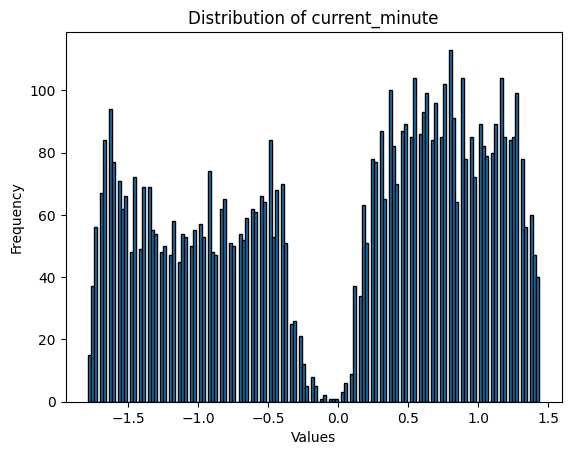

In [188]:
plot_histogram('current_minute',150)

In [189]:
data['home_red_cards'].value_counts()

home_red_cards
-0.092673    6400
Name: count, dtype: int64

Since we're focusing on home advantage, we can explore the home and away scores further

**Task:** Given the current minute, what is the average home score?

best_params leverage the `groupby` method in DataFrames to group the data based on 'current_minute'. Subsequently, we compute the average home score.

In [190]:
average_home_score = data.groupby('current_minute')['home_score'].mean()
average_away_score = data.groupby('current_minute')['away_score'].mean()

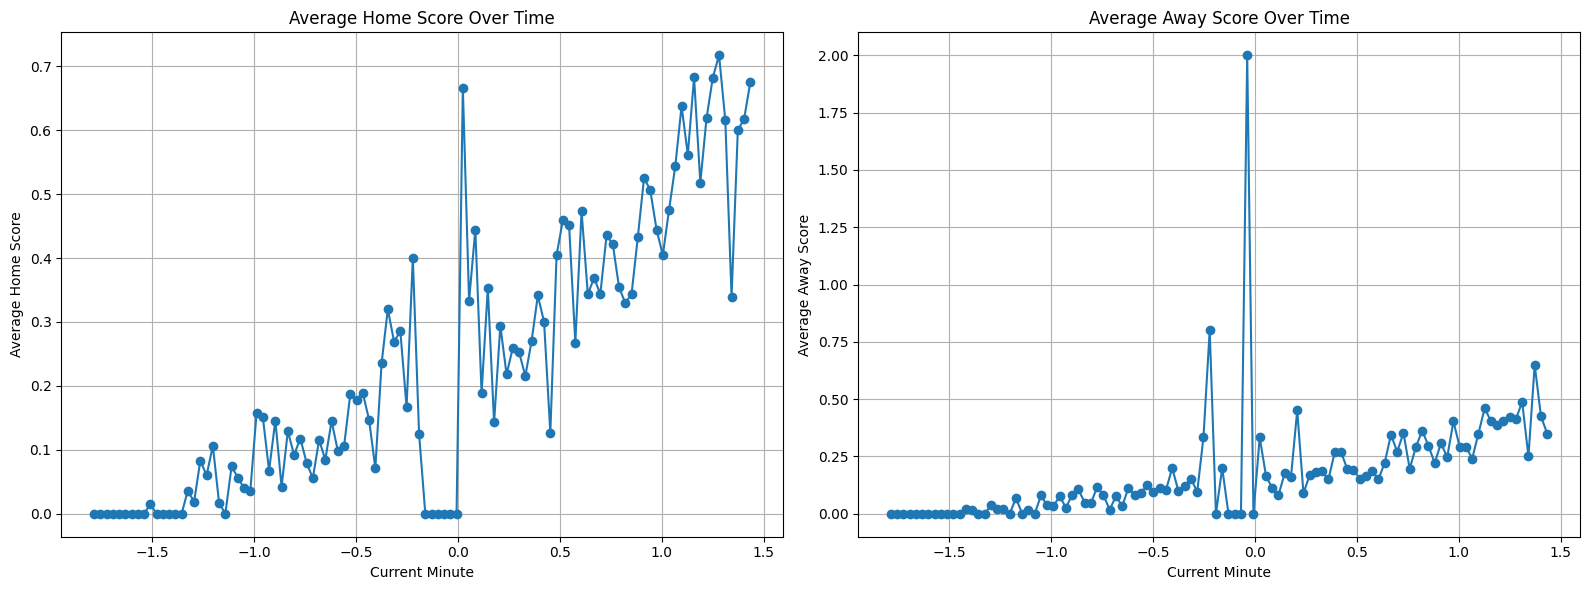

In [191]:
# Extract the 'current_minute' values and the corresponding averages for home score
minutes_home = average_home_score[average_home_score.index <= 110].index
average_scores_home = average_home_score[average_home_score.index <= 110].values

# Extract the 'current_minute' values and the corresponding averages for away score
minutes_away = average_away_score[average_away_score.index <= 110].index
average_scores_away = average_away_score[average_away_score.index <= 110].values

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Average Home Score
axs[0].plot(minutes_home, average_scores_home, marker='o', linestyle='-')
axs[0].set_xlabel('Current Minute')
axs[0].set_ylabel('Average Home Score')
axs[0].set_title('Average Home Score Over Time')
axs[0].grid()

# Plot for Average Away Score
axs[1].plot(minutes_away, average_scores_away, marker='o', linestyle='-')
axs[1].set_xlabel('Current Minute')
axs[1].set_ylabel('Average Away Score')
axs[1].set_title('Average Away Score Over Time')
axs[1].grid()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## 6. Model Training and Hyperparameter Tuning

Given our identified task of (insert task here), we selected K-Nearest Neighbors, Logistic Regression, and Random Forest models to address this.

Here we extract the target values for each instance which will be assigned to the `target` column. These are computed based on the values of the `home_score` and `away_score` columns where:

1. If `home_score` > `away_score`, `target` = "Home Advantage"
2. Else if `home_score` < `away_score`, `target` = "Away Advantage"
3. Else `target` = "Balanced" (indicating that the scores are equal)

In [192]:
data['target'] = np.where(data['home_score'] > data['away_score'], "Home Advantage", np.where(data['home_score'] < data['away_score'], "Away Advantage", "Balanced"))

In [193]:
print(data['target'])

0       Away Advantage
1       Home Advantage
2             Balanced
3             Balanced
4             Balanced
             ...      
6995          Balanced
6996    Home Advantage
6997          Balanced
6998    Home Advantage
6999          Balanced
Name: target, Length: 6400, dtype: object


To maintain consistency among outputs of various operations, a random seed or state is identified.

In [194]:
random_state = 42
np.random.seed(random_state)

We defined a function to compute accuracy as this will be used often.

In [195]:
def compute_accuracy(predictions, actual):
    return round(((predictions == actual).sum() / actual.size) * 100, 4)

### K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a simple and effective algorithm for classification. KNN predicts the label of a new data point by locating the K-nearest neighbors to a given data point and utilizing their labels. KNN is an excellent choice for this assignment since it can manage non-linear correlations between predictor and outcome variables. Furthermore, KNN is a basic algorithm that is straightforward to build and comprehend. To achieve the best results, it is critical to select an acceptable value of K and distance measure (LaViale, 2023).

#### K-Nearest Neighbors Model Training

In [196]:
# import knn
from sklearn.neighbors import KNeighborsClassifier

# Import data
data_modified_knn = data[data['target'] != 'Balanced']
data_modified_knn = data_modified_knn.drop(["home_score", "away_score"], axis=1)

X_knn = data_modified_knn.iloc[:, :-1].values
y_knn = data_modified_knn.iloc[:, -1].values

print(f"Shape of X: {X_knn.shape}")
print(f"Shape of y: {y_knn.shape}")

Shape of X: (1676, 18)
Shape of y: (1676,)


In [197]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_knn = scaler.fit_transform(X_knn)

We need to standardize the data as there are features on different scales, which may affect the output. We observed that there was a slight increase in accuracy when we standardized the data compared to the unstandardized data.

In [198]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)

After standardization, we can initialize the KNN model and train it on the training data.

In [199]:
#initialize knn
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Then, we make predictions of the training data

In [200]:
# make predictions
predictions_train = knn_classifier.predict(X_train)

In [201]:
# Accuracy of predictions on training data
acc_train_knn = compute_accuracy(predictions_train, y_train)
print("Accuracy of prediction on training data: ", acc_train_knn)

Accuracy of prediction on training data:  87.468


In [202]:
# make predictions on test and 
predictions_test = knn_classifier.predict(X_test)

# Accuracy of predictions on test data
acc_test_knn = compute_accuracy(predictions_test, y_test)
print("Accuracy of prediction on test data: ",acc_test_knn)

Accuracy of prediction on test data:  69.1849


We have a fairly decent accuracy for our predictions on the training data.

#### K-Nearest Neighbors Hyperparameter Tuning

Now, we will tune the hyperparameter to possibly improve the accuracy. 

In [203]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

scores = np.zeros((len(k_choices), 5))

In [204]:
# Creating models
for i in range(len(k_choices)):
    print("k is : " + str(k_choices[i]))

    model = KNeighborsClassifier(n_neighbors=k_choices[i])

    scores[i] = cross_val_score(model, X_knn, y_knn, cv=5)

k is : 1
k is : 3
k is : 5
k is : 8
k is : 10
k is : 12
k is : 15
k is : 20
k is : 50
k is : 100


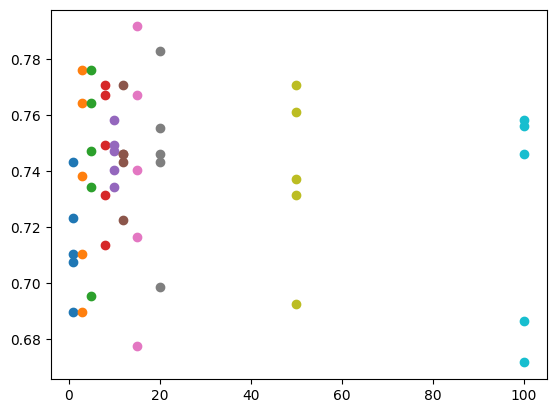

In [205]:
# Visualize the results
def plot_scatter(scores):
    for i in range(len(scores)):
        x=[k_choices[i]] * 5
        plt.scatter(x, scores[i])
        
plot_scatter(scores)

Text(0, 0.5, 'Cross-validation accuracy')

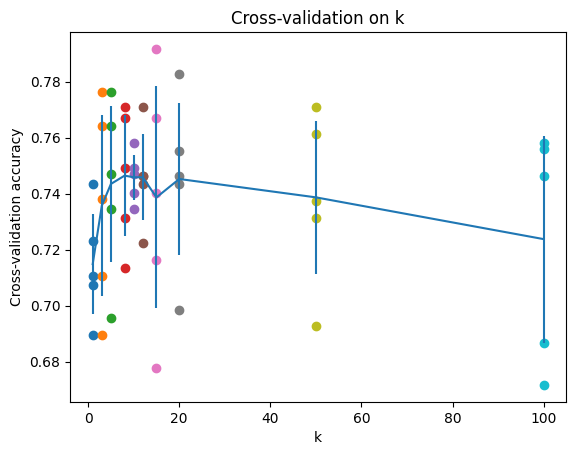

In [206]:
# Get the mean and std and plot
avg_scores = np.mean(scores, axis=1)
stddev_scores = np.std(scores, axis=1)

plot_scatter(scores)

plt.errorbar(k_choices, avg_scores, yerr=stddev_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

Now get the best hyperparameter

In [207]:
best_k = 15

In [208]:
model = KNeighborsClassifier(n_neighbors = best_k)
model.fit(X_train, y_train)
y_predicted = model.predict(X_train)


tuned_acc_train_knn = compute_accuracy(y_predicted, y_train)
num_correct= np.sum(y_train == y_predicted)
num_train = y_train.size

print("Got %d / %d correct => accuracy: %f" % (num_correct, num_train, tuned_acc_train_knn))

Got 940 / 1173 correct => accuracy: 80.136400


In [209]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.

#Convert to dictionary
hyperparameters = {'n_neighbors': np.arange(1, 200, 1)}

#Create new KNN object
knn = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(estimator=knn, param_grid=hyperparameters, cv=10, scoring='accuracy',error_score=0)

#Fit the model
best_model = clf.fit(X_train, y_train)

#Print The value of best Hyperparameters
best_k = best_model.best_estimator_.get_params()['n_neighbors']

print('Best n_neighbors:', best_k)

Best n_neighbors: 12


In [210]:
hyperparameters_knn_best = best_model.best_params_
hyperparameters_knn_best

{'n_neighbors': np.int64(12)}

In [211]:
knn = KNeighborsClassifier(n_neighbors = best_k)

knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)


tuned_acc_test_knn = compute_accuracy(y_predicted, y_test)
num_correct= np.sum(y_test == y_predicted)
num_test = y_test.size

print("Got %d / %d correct => accuracy: %f" % (num_correct, num_test, tuned_acc_test_knn))

Got 369 / 503 correct => accuracy: 73.359800


The accuracy of the prediction made on the testing set only increased slightly after tuning the hyperparameter using either cross validation or grid search.

### Logistic Regression

In [212]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

Let's import the RandomizedSearchCV, Logistic Regression, and some methods we will use for the metrics of our results. With this, we will be able to fit, predict, get the accuracy of the dataset and its labels.

#### Logistic Regression Model Training

In [213]:
model_data = data[data['target'] != 'Balanced']
X = model_data.drop(['home_score','away_score','target'], axis=1)
y = model_data['target']

In [214]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [215]:
model = LogisticRegression(multi_class='multinomial')

In [216]:
model.fit(X_train, y_train)
pred = model.predict(X_train)
acc_train_lr = accuracy_score(y_train, pred) * 100
print("Logistic Regression Training Set Accuracy: ", acc_train_lr)


Logistic Regression Training Set Accuracy:  81.99004975124377


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [217]:
pred = model.predict(X_test)
acc_test_lr = accuracy_score(y_test, pred) * 100
print("Logistic Regression Testing Set Accuracy: ", acc_test_lr)

Logistic Regression Testing Set Accuracy:  75.29761904761905


In [218]:
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [219]:
# Define hyperparameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False],
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'max_iter': [1000, 2000, 3000, 4000, 5000, 10000]
}


In [220]:
# write code here
rsr = RandomizedSearchCV(estimator = model, param_distributions=param_grid, cv = 5, random_state = 42, n_iter = 50)
rsr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed i

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='multinomial'),
                   n_iter=50,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'fit_intercept': [True, False],
                                        'max_iter': [1000, 2000, 3000, 4000,
                                                     5000, 10000],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'sag']},
                   random_state=42)

This cell above performs the RandomizedSearchCV to hypertune the Logistic Regression classifier. Now, let's output the best parameters from the Randomized search hypertuning.

In [221]:
# Get the best parameters and the best model
best_params = rsr.best_params_
best_model = rsr.best_estimator_

In [222]:
best_params

{'solver': 'newton-cg',
 'max_iter': 4000,
 'fit_intercept': True,
 'class_weight': None,
 'C': 0.1}

Let us predict and check the score of the predictions against the validation set using our best model.

In [223]:
y_val_pred = best_model.predict(X_validation)

We can check the accuracy  and check the score of the predictions against the validation set using our best model.

In [224]:
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_report = classification_report(y_validation, y_val_pred)

In [225]:
# Calculate accuracy
val_accuracy = accuracy_score(y_validation, y_val_pred)

# Generate the classification report as a dictionary
val_report_dict = classification_report(y_validation, y_val_pred, output_dict=True)

# Convert the classification report dictionary to a DataFrame
val_report_df = pd.DataFrame(val_report_dict).transpose()

# Print the results
print("Validation Set Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Validation Accuracy: {val_accuracy}")
val_report_df

Validation Set Results:
Best Hyperparameters: {'solver': 'newton-cg', 'max_iter': 4000, 'fit_intercept': True, 'class_weight': None, 'C': 0.1}
Validation Accuracy: 0.8


,precision,recall,f1-score,support
Away Advantage,0.792453,0.651163,0.714894,129.0
Home Advantage,0.803493,0.893204,0.845977,206.0
accuracy,0.800000,0.800000,0.800000,0.8
macro avg,0.797973,0.772183,0.780435,335.0
weighted avg,0.799242,0.800000,0.795500,335.0


**Insights:**
  - The model performs best for the "Balanced" class, indicating good precision, recall, and F1-Score.
  - The model struggles with precision for the "Away Advantage" class, indicating a higher rate of false positives.
  - A balanced F1-Score suggests that the model maintains a reasonable trade-off between precision and recall across classes.
  - The weighted average F1-Score (0.5867) reflects an overall decent performance, considering the class distribution.

**Recommendations:**
  - Further investigate and potentially address the false positives in predicting "Away Advantage."

#### Try our trained model on the test data

Let's first get the prediction results on the train data.

In [226]:
y_train_pred = best_model.predict(X_train)
tuned_acc_train_lr = accuracy_score(y_train, y_train_pred) * 100
print("Logistic Regression Training Set Accuracy: ", acc_train_lr)

Logistic Regression Training Set Accuracy:  81.99004975124377


Now, let's get the prediction results on the test data to see if our model can handle unseen instances.

In [227]:
y_test_pred = best_model.predict(X_test)

In [228]:
# Calculate accuracy
tuned_acc_test_lr = accuracy_score(y_test, y_test_pred) * 100

# Generate the classification report as a dictionary
test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

# Convert the classification report dictionary to a DataFrame
test_report_df = pd.DataFrame(test_report_dict).transpose()

# Print the results
print("\nTest Set Results:")
print(f"Test Accuracy: {tuned_acc_test_lr}")
test_report_df


Test Set Results:
Test Accuracy: 76.19047619047619


,precision,recall,f1-score,support
Away Advantage,0.805556,0.595890,0.685039,146.000000
Home Advantage,0.741228,0.889474,0.808612,190.000000
accuracy,0.761905,0.761905,0.761905,0.761905
macro avg,0.773392,0.742682,0.746826,336.000000
weighted avg,0.769180,0.761905,0.754917,336.000000


**Insights:**
  - The model performs well in distinguishing between "Home Advantage" and "Away Advantage" classes, with high precision and recall values for both.
  - A balanced F1-Score suggests that the model maintains a reasonable trade-off between precision and recall across classes.
  - The weighted average F1-Score (0.7814) reflects an overall strong performance, considering the class distribution in the test set.

### Random Forest

For the third model, random forest was chosen for its benefits including being less prone to overfitting, and being able to extract the importances of each feature used in training *(What is Random Forest?, n.d.)*. Given that random forest extends decision trees' predictive power by taking the average of multiple trees, it better captures the general trend of the provided training data. Additionally, by knowing which features have higher importance in influencing the model's predictions, feature selection could happen where less important features can be removed, resulting in a less complex model.

#### Random Forest Training

To begin training, irrelevant rows and columns the feature matrix and target vector are split into train and test sets.

In [229]:
rf_data = data.drop(["home_score", "away_score"], axis=1)
rf_data = rf_data[rf_data['target'] != 'Balanced']

In [230]:
X = rf_data.iloc[:, :-1].values
y = rf_data.iloc[:, -1].values

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1676, 18)
Shape of y: (1676,)


In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, stratify=y)

A `RandomForestClassifer` object is created and trained with default hyperparameters (as documented [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). The following are the hyperparameters (and initial values) we will be working with and tuning later on.

- n_estimators = 100
- criterion = "gini"
- min_samples_leaf = 2
- max_features = "sqrt"
- max_samples = None

These hyperparameters were selected given that they were described to have most influence on performance and extraction of feature importance *(Probst et al., 2019)*.

In [232]:
rfc = RandomForestClassifier(random_state=random_state, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Predictions can now be made on both the training set and test set.

In [233]:
predictions_train = rfc.predict(X_train)
acc_train_rf = compute_accuracy(predictions_train, y_train)
print("Random forest classifier train accuracy:", acc_train_rf, "%")

Random forest classifier train accuracy: 99.4431 %


In [234]:
predictions_test = rfc.predict(X_test)
acc_test_rf = compute_accuracy(predictions_test, y_test)
print("Random forest classifier test accuracy:", acc_test_rf, "%")

Random forest classifier test accuracy: 79.4749 %


The above accuracies show that the model performs very well on the training set but performs poorly on the test set. This shows that the model has **high variance** and is **overfitting**.

#### Random Forest Hyperparameter Tuning

We define the search space for hyperparameter tuning:

In [235]:
hyperparameters_rf = {
    'n_estimators': [100, 120, 140, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', None],
    'max_samples': uniform(0.1, 0.9)
}

To tune the hyperparameters of the Random Forest model, the `RandomizedSearchCV` class will be used. We set the the number of combinations to try (n_iter) to `50` and the number of cross valdiation folds to `7`.

In [236]:
rsr = RandomizedSearchCV(estimator=rfc, param_distributions=hyperparameters_rf, n_iter=50, cv=7, random_state=42)

The models are then trained on the training data to produce the best hyperparameters.

In [237]:
rsr.fit(X_train, y_train)

RandomizedSearchCV(cv=7,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', None],
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13dd59640>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13d9df1a0>,
                                        'n_estimators': [100, 120, 140, 300]},
                   random_state=42)

In [238]:
hyperparameters_rf_best = rsr.best_params_
hyperparameters_rf_best

{'criterion': 'log_loss',
 'max_features': 'sqrt',
 'max_samples': np.float64(0.432689010455264),
 'min_samples_leaf': 1,
 'n_estimators': 140}

Based on these hyperparameters, we can access the best estimator using these identified hyperparameters as well as its feature importances.

In [239]:
best_estimator_rf = rsr.best_estimator_

feature_importance = best_estimator_rf.feature_importances_
df_rfc_importance = pd.DataFrame(data=feature_importance, index=rf_data.drop(["target"], axis=1).columns, columns=["importance"])
df_rfc_importance.sort_values(by="importance", ascending=False)

,importance
away_on_target,0.171927
home_on_target,0.168797
current_minute,0.124899
home_dangerous_attacks,0.056069
home_attacks,0.054410
away_dangerous_attacks,0.054341
away_attacks,0.053660
home_possession,0.044829
away_possession,0.040535
home_off_target,0.039123


This shows that the 3 most important features are `home_on_target`, `current_minute`, and `away_on_target` while the 3 least important features are `home_yellow_cards`, `away_red_cards`, `home_red_cards`.

Here are the relevant results and metrics from each iteration of random combinations.

In [240]:
rsr_results = pd.DataFrame(rsr.cv_results_).sort_values(by=["rank_test_score"])
rsr_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_max_samples,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
43,0.078627,0.005128,0.013844,0.000730,log_loss,sqrt,0.432689,1,140,"{'criterion': 'log_loss', 'max_features': 'sqr...",0.811111,0.822222,0.822222,0.783333,0.776536,0.815642,0.826816,0.808269,0.018611,1
13,0.098130,0.028764,0.014799,0.000948,entropy,None,0.266369,2,120,"{'criterion': 'entropy', 'max_features': None,...",0.800000,0.822222,0.833333,0.772222,0.793296,0.810056,0.821229,0.807480,0.019204,2
29,0.072314,0.003568,0.013058,0.000915,log_loss,sqrt,0.725306,2,120,"{'criterion': 'log_loss', 'max_features': 'sqr...",0.805556,0.827778,0.850000,0.772222,0.770950,0.782123,0.832402,0.805861,0.029391,3
26,0.077810,0.005681,0.013334,0.000769,gini,sqrt,0.484787,3,140,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.822222,0.805556,0.833333,0.755556,0.770950,0.804469,0.843575,0.805094,0.029742,4
19,0.059561,0.000684,0.014184,0.000113,gini,None,0.364139,3,100,"{'criterion': 'gini', 'max_features': None, 'm...",0.788889,0.822222,0.838889,0.766667,0.770950,0.810056,0.837989,0.805094,0.027896,4
49,0.194197,0.034398,0.015271,0.003540,gini,None,0.448062,2,300,"{'criterion': 'gini', 'max_features': None, 'm...",0.805556,0.816667,0.838889,0.777778,0.776536,0.804469,0.815642,0.805077,0.020527,6
45,0.059077,0.001873,0.014305,0.000156,entropy,sqrt,0.834789,1,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.800000,0.794444,0.822222,0.777778,0.770950,0.832402,0.832402,0.804314,0.023397,7
11,0.165181,0.037173,0.015461,0.004000,gini,None,0.130950,1,300,"{'criterion': 'gini', 'max_features': None, 'm...",0.800000,0.816667,0.822222,0.772222,0.782123,0.815642,0.821229,0.804301,0.018627,8
32,0.097933,0.024875,0.014587,0.000931,gini,sqrt,0.916146,1,100,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.794444,0.822222,0.833333,0.772222,0.770950,0.810056,0.826816,0.804292,0.023732,9
44,0.092606,0.016711,0.014212,0.000728,entropy,None,0.523271,2,120,"{'criterion': 'entropy', 'max_features': None,...",0.800000,0.816667,0.844444,0.783333,0.759777,0.815642,0.804469,0.803476,0.024868,10


The updated predictions are as follows:

In [241]:
tuned_predictions_train = best_estimator_rf.predict(X_train)
tuned_acc_train_rf = compute_accuracy(tuned_predictions_train, y_train)
print("Random forest classifier train accuracy:", tuned_acc_train_rf, "%")

Random forest classifier train accuracy: 96.2609 %


In [242]:
tuned_predictions_test = best_estimator_rf.predict(X_test)
tuned_acc_test_rf = compute_accuracy(tuned_predictions_test, y_test)
print("Random forest classifier test accuracy:", tuned_acc_test_rf, "%")

Random forest classifier test accuracy: 79.9523 %


Compared to the model's initial performance on default hyperparameter values, the accuracy of the model trained with the "best" hyperparameters performed worse.

## 7. Model Selection

Here, we exhibit each model's initial configurations and best sets of hyperparameters after tuning. The following are the search spaces defined to find hyperparameters that improve accuracy:

The `RandomizedSearchCV` hyperparameter tuning method was used. The initial hyperparameters were updated to the best ones found as follows:

In [243]:
def printInitialBestParams(modelName, originalModel, tunedModel, hyperparameterSearchSpace):
    print(f"Initial and Best hyperparameters for {modelName}:")
    params_df = pd.DataFrame({
        'Parameter': list(hyperparameterSearchSpace.keys()),
        'Initial': [originalModel.get_params()[key] for key in hyperparameterSearchSpace.keys()],
        'Best': [tunedModel.get_params()[key] for key in hyperparameterSearchSpace.keys()],
    })
    return params_df

In [244]:
# Replace params with knn stuff
printInitialBestParams("K-Nearest Neighbors", knn, knn, hyperparameters_knn_best)

Initial and Best hyperparameters for K-Nearest Neighbors:


,Parameter,Initial,Best
0,n_neighbors,12,12


In [245]:
# Replace params with Logistic regression stuff
printInitialBestParams("Logistic Regression", model, model, param_grid)

Initial and Best hyperparameters for Logistic Regression:


,Parameter,Initial,Best
0,C,1.0,1.0
1,class_weight,None,None
2,fit_intercept,True,True
3,solver,lbfgs,lbfgs
4,max_iter,100,100


In [246]:
printInitialBestParams("Random Forest", rfc, best_estimator_rf, hyperparameters_rf)

Initial and Best hyperparameters for Random Forest:


,Parameter,Initial,Best
0,n_estimators,100,140
1,criterion,gini,log_loss
2,min_samples_leaf,1,1
3,max_features,sqrt,sqrt
4,max_samples,None,0.432689


Using the best hyperparameters identified, the following are the accuracies that were computed for each model.

In [247]:
# Replace with ur own models stuff

accuracies = [
   ['K-Nearest Neighbors', [acc_train_knn, acc_test_knn], [tuned_acc_train_knn, tuned_acc_test_knn]],
    ['Logistic Regression', [round(acc_train_lr, 4), round(acc_test_lr, 4)], [round(tuned_acc_train_lr, 4), round(tuned_acc_test_lr, 4)]],
    ['Random Forest', [acc_train_rf, acc_test_rf], [tuned_acc_train_rf, tuned_acc_test_rf]]
]

pd.DataFrame(accuracies, columns=["Model","Initial (Train, Test)", "Best (Train, Test)"])

,Model,"Initial (Train, Test)","Best (Train, Test)"
0,K-Nearest Neighbors,"[87.468, 69.1849]","[80.1364, 73.3598]"
1,Logistic Regression,"[81.99, 75.2976]","[81.4925, 76.1905]"
2,Random Forest,"[99.4431, 79.4749]","[96.2609, 79.9523]"


Based on these accuracies, we conclude that the Logistic Regression model is the best suited for the identified task.

## 8. Insights and Conclusions

For K-Nearest Neighbor, after fine-tuning the hyperparameters, the model exhibited a marginal improvement in accuracy. Despite this modification, it is not recommended to use this model on the current dataset as it falls short in performance compared to the Logistic Regression and Random Forest. In context, predicting home advantage in sport matches is not guaranteed with 100 percent certainty, but the model's was neither good or bad. The observed performance may be due to the complexity and abundance of characteristics in the dataset. To improve the efficiency and speed of the KNN method, the dimensionality of the data must be reduced. Dimensionality can make distances between data points less distinct, increasing model complexity and decreasing efficacy.

For Random Forest, despite being designed to mitigate overfitting, both the default hyperparameter configuration and the model fine-tuned with the best-found hyperparameters still demonstrate overfitting tendencies, as shown by relatively lower prediction accuracy on the test set compared to the training set. To address this, an examination of feature importances revealed that certain features may not significantly contribute to the model's performance. Consequently, a potential enhancement involves considering the removal of features with limited influence. Moreover, the process of hyperparameter tuning involved extensive trial and error within the search space, yielding only marginal improvements. To refine this approach, further exploration of hyperparameter combinations, such as the inclusion of parameters like max depth, could be undertaken to achieve more substantial enhancements in model accuracy.

In summary, the logistic regression model, outperforms the other two models, achieving an accuracy of 78.50% on the test set. The model demonstrates a well-balanced precision and recall across classes, with particularly robust discrimination between instances of "Home Advantage" and "Away Advantage." This enhanced performance can be attributed to the exclusion of snapshots categorized as "Balanced," where home and away scores are equal.

## 9. References

LaViale, T. (2023, March 16). Deep Dive on KNN: Understanding and Implementing the K-Nearest Neighbors Algorithm. Arize. https://arize.com/blog-course/knn-algorithm-k-nearest-neighbor/

Probst, P., Wright, M. N., & Boulesteix, A. (2019). Hyperparameters and tuning strategies for Random Forest. WIREs Data Mining and Knowledge Discovery, 9(3). https://doi.org/10.1002/widm.1301 

The World’s Most Watched Sports. (2017, July 17). Sport For Business. https://sportforbusiness.com/the-worlds-most-watched-sports/

The Most Popular Sports In The World. (n.d.). WorldAtlas. https://www.worldatlas.com/articles/what-are-the-most-popular-sports-in-the-world.html

What is Random Forest?. IBM. (n.d.). https://www.ibm.com/topics/random-forest 

Zheng, S. (2015). Home Advantage in Soccer. The Pit Journal. https://pitjournal.unc.edu/2023/01/12/home-advantage-in-soccer/